# Machine Learning - Task 1 Titanic Classification
In this activity, we aim to classify Titanic passengers based on their likelihood of survival.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

### 1. Load datasets

In [3]:
# Load Data
train_path = 'C:/Users/femij/Downloads/titanic/train.csv'
test_path = 'C:/Users/femij/Downloads/titanic/test.csv'
truth_path = 'C:/Users/femij/Downloads/truth_titanic.csv'

titanic_train = pd.read_csv(train_path)
titanic_test = pd.read_csv(test_path)
truth_titanic = pd.read_csv(truth_path)

### 2. Exploring the dataset

In [4]:
titanic_train.head() # Preview the first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_train.info() # Explore dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_train.describe() # Explore dataset Statistics 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Check for missing values
print(titanic_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Visualizations

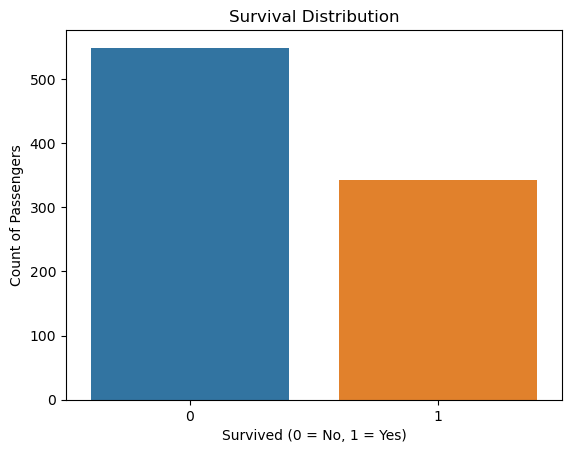

In [8]:
# 1. Visualize the dataset: Survival distribution
sns.countplot(x = "Survived", data = titanic_train)
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count of Passengers")
plt.show()

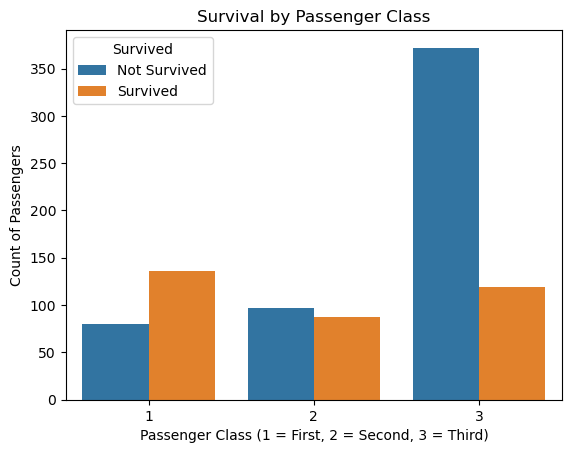

In [9]:
# 2. Visualize the data: Survived vs Pclass

# Convert 'Survived' to categorical for better legend labeling
titanic_train['Survived'] = titanic_train['Survived'].map({0: 'Not Survived', 1: 'Survived'})

# Create the countplot
sns.countplot(x="Pclass", hue="Survived", data=titanic_train)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Count of Passengers")
plt.legend(title="Survived")
plt.show()

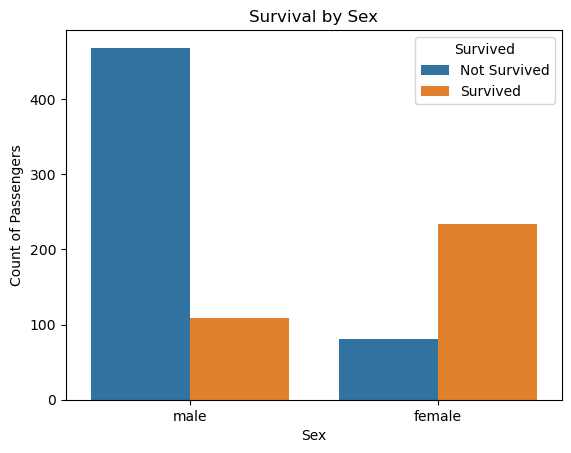

In [10]:
# 3. Visualize the data: Survived vs Sex
sns.countplot(x = "Sex", hue = "Survived", data = titanic_train)
plt.title("Survival by Sex")
plt.xlabel("Sex")
plt.ylabel("Count of Passengers")
plt.legend(title="Survived")
plt.show()

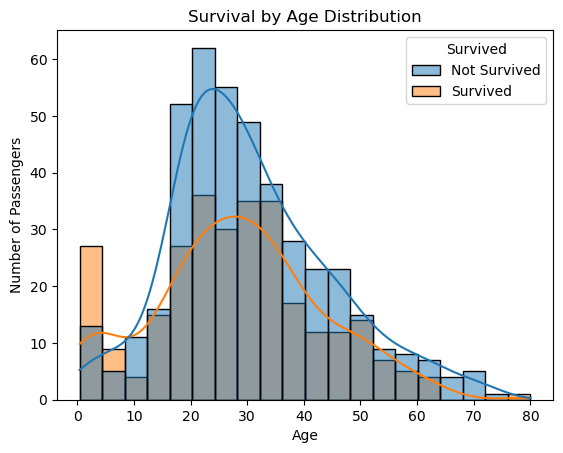

In [11]:
# 4. Visualize the dataset: Survived vs Age Distribution

# Handle infinite values by replacing them with NaN
titanic_train['Age'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Survived vs Age Distribution
sns.histplot(data=titanic_train, x="Age", hue="Survived", kde=True)
plt.title("Survival by Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

### 4. Processing the data

In [12]:
## Handle Missing Values
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].mean())
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mean())
titanic_train['Embarked'] = titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0])

In [13]:
# Drop irrelevant columns
titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [14]:
# Encoding categorical variables
titanic_train = pd.get_dummies(titanic_train, columns=['Sex', 'Embarked'], drop_first=True)
titanic_test = pd.get_dummies(titanic_test, columns=['Sex', 'Embarked'], drop_first=True)

In [15]:
# Align test data columns to train
missing_cols = set(titanic_train.columns) - set(titanic_test.columns)
for col in missing_cols:
    titanic_test[col] = 0
titanic_test = titanic_test[titanic_train.columns.drop('Survived')]

In [16]:
# Splitting data
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Modeling

In [17]:
# Baseline Model: DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=2020)
dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_test)

In [18]:
print("Dummy Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, dummy_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, dummy_pred, pos_label='Survived'):.3f}")

Dummy Classifier Performance:
Accuracy: 0.587
F1 Score: 0.000


In [19]:
# Improved Model: Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

In [20]:
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, dt_pred, pos_label='Survived'):.3f}")

Decision Tree Performance:
Accuracy: 0.793
F1 Score: 0.745


In [21]:
# Advanced Model: Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

In [22]:
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, rf_pred, pos_label='Survived'):.3f}")

Random Forest Performance:
Accuracy: 0.804
F1 Score: 0.755


### 6. Prediction

In [67]:
# Make 5 predictions with Dummy Classifier
new_data = X_test[:5]  # Taking the first 5 rows for prediction
predictions = dummy_clf.predict(new_data)

# Print the predictions
print("Predictions for the first 5 rows:")
print(predictions)

Predictions for the first 5 rows:
['Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived']


In [68]:
# Make 5 predictions with Decision Tree
new_data = X_test[:5]  # Taking the first 5 rows for prediction
predictions = dt_clf.predict(new_data)

# Print the predictions
print("Predictions for the first 5 rows:")
print(predictions)

Predictions for the first 5 rows:
['Not Survived' 'Survived' 'Survived' 'Survived' 'Survived']


In [69]:
# Make 5 predictions with Random Forest
new_data = X_test[:5]  # Taking the first 5 rows for prediction
predictions = rf_clf.predict(new_data)

# Print the predictions
print("Predictions for the first 5 rows:")
print(predictions)

Predictions for the first 5 rows:
['Not Survived' 'Not Survived' 'Not Survived' 'Survived' 'Not Survived']


### End

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
os.environ["OMP_NUM_THREADS"] = "1"